# [UFO Sightings](https://youtu.be/0Jw8seqai18)

- [Source code with die throws plotting as well](https://github.com/ArjanCodes/examples/blob/main/2023/jupyter/nb1_ufo.ipynb)
- [Kaggle Dataset](https://www.kaggle.com/datasets/NUFORC/ufo-sightings)

In [16]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
ufo_df = pd.read_csv("data/ufo_scrubbed.csv")

ufo_df.columns = [c.strip() for c in ufo_df.columns]

ufo_df["datetime"] = pd.to_datetime(ufo_df["datetime"].str.replace('24:00', '0:00'))
ufo_df["date posted"] = pd.to_datetime(ufo_df["date posted"])
ufo_df["latitude"] = pd.to_numeric(ufo_df["latitude"], errors="coerce")
ufo_df["longitude"] = pd.to_numeric(ufo_df["longitude"], errors="coerce")



/var/folders/nc/9qhrjynn6vjfcdgr9x5llf180000gn/T/ipykernel_37603/2080882940.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv("data/ufo_scrubbed.csv")


In [13]:
ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


<AxesSubplot:title={'center':'Number of sightings against time'}, xlabel='datetime', ylabel='Number of sightings'>

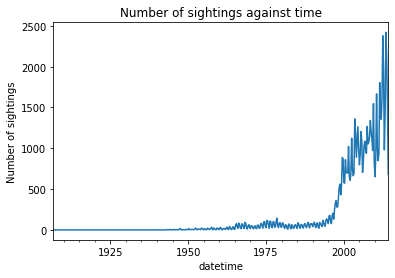

In [15]:

plt.ylabel('Number of sightings')
plt.xlabel('')
plt.title('Number of sightings against time')
ufo_df.set_index('datetime').resample('Q')['shape'].count().plot()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

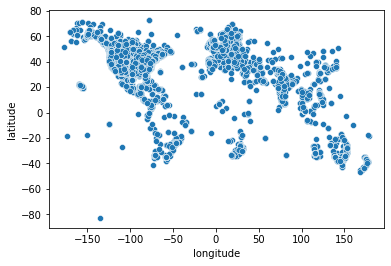

In [21]:
sns.scatterplot(data=ufo_df, x='longitude', y='latitude')

/var/folders/nc/9qhrjynn6vjfcdgr9x5llf180000gn/T/ipykernel_37603/3726411746.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<AxesSubplot:title={'center':'UFO Sightings'}, xlabel='longitude', ylabel='latitude'>

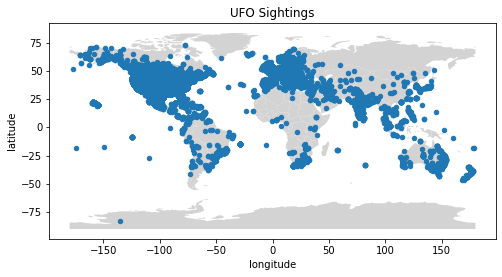

In [25]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# Create geopandas map
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)

# plot points
ufo_df.plot(x="longitude", y="latitude", kind="scatter", 
        title=f"UFO Sightings", 
        ax=ax)


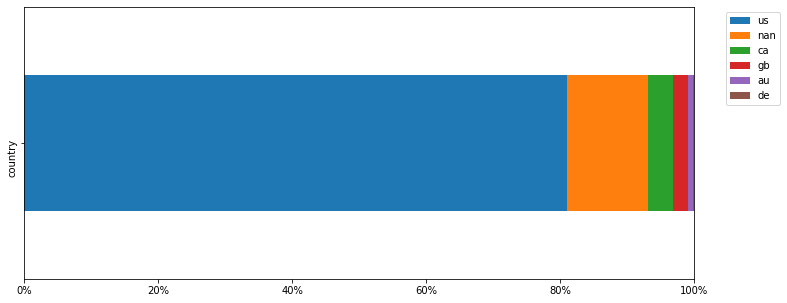

In [26]:
ufo_df['country'].value_counts(normalize=True, dropna=False).to_frame().T.plot(
    kind='barh', stacked=True, rot=90, figsize=(12, 5)
)
plt.xlim(0, 1)
plt.margins(y=0)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

<AxesSubplot:title={'center':'NZ UFO Sightings'}, xlabel='longitude', ylabel='latitude'>

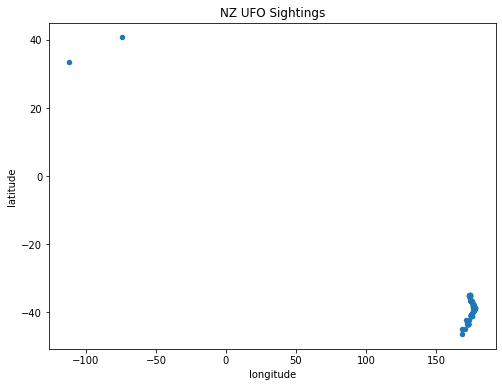

In [33]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
# countries = gpd.read_file(  
#      gpd.datasets.get_path("naturalearth_lowres"))
# countries[countries["name"] == "New Zealand"].plot(color="lightgrey",
#                                                  ax=ax)

# New DF with only NZ UFO sightings
nz_ufo_df = ufo_df[ufo_df['city'].str.lower().str.contains("new zealand")]
nz_ufo_df.head()
# plot locations
nz_ufo_df.plot(x="longitude", y="latitude", kind="scatter", 
        title=f"NZ UFO Sightings", 
        ax=ax)
